In [15]:
# https://sci-hub.se/https://doi.org/10.1017/S0962492920000021

In [16]:
# Downloads historical stock price data for AAPL from January 1, 2022, to January 1, 2023, using yfinance.
#Calculates daily returns based on the adjusted closing prices.
#Applies the Isolation Forest algorithm to detect anomalies in the returns data.
#Visualizes the detected anomalies in a plot, highlighting them in red.
#Prints the entire dataset with anomaly labels for further analysis.

In [17]:
# Machine learning models like , below,  etc. can all be used to successfully detect anomalies.
#1 Isolation forests
#2 local outlier factor
#3 autoencoders

In [18]:
#"""""""""""""""""""""""""""""""""""""""""""""""""""
#What are the 5 ways to detect outliers anomalies?
#Most popular outlier detection methods are Z-Score, IQR (Interquartile Range), Mahalanobis Distance, 
#DBSCAN (Density-Based Spatial Clustering of Applications with Noise, Local Outlier Factor (LOF),
        #and One-Class SVM (Support Vector Machine).
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [19]:
ticker = '^NSEI'
start='2014-01-01'
end='2024-01-01'

[*********************100%%**********************]  1 of 1 completed


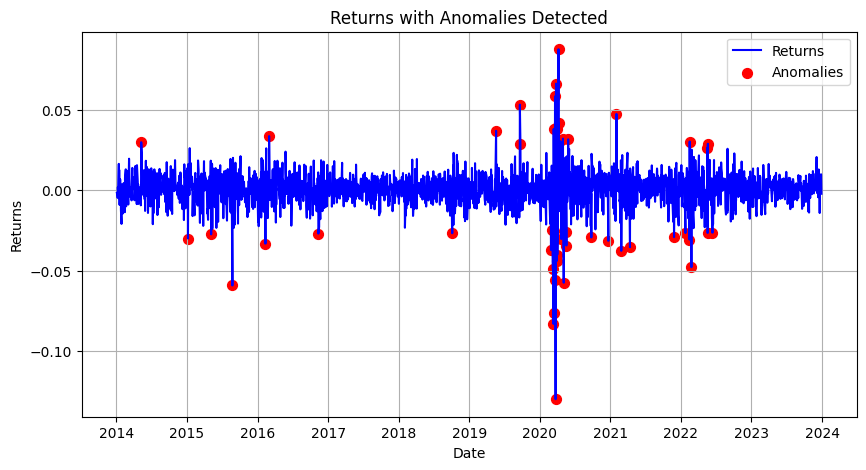

                    Open          High           Low         Close  \
Date                                                                 
2014-01-03   6194.549805   6221.700195   6171.250000   6211.149902   
2014-01-06   6220.850098   6224.700195   6170.250000   6191.450195   
2014-01-07   6203.899902   6221.500000   6144.750000   6162.250000   
2014-01-08   6178.049805   6192.100098   6160.350098   6174.600098   
2014-01-09   6181.700195   6188.049805   6148.250000   6168.350098   
...                  ...           ...           ...           ...   
2023-12-22  21295.849609  21390.500000  21232.449219  21349.400391   
2023-12-26  21365.199219  21477.150391  21329.449219  21441.349609   
2023-12-27  21497.650391  21675.750000  21495.800781  21654.750000   
2023-12-28  21715.000000  21801.449219  21678.000000  21778.699219   
2023-12-29  21737.650391  21770.300781  21676.900391  21731.400391   

               Adj Close  Volume   Returns  Anomaly_Score  Anomaly_Label  
Date          

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Define the ticker symbol


# Download historical data using yfinance
data = yf.download(ticker, start = start, end = end)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Drop the first row with NaN return
data.dropna(inplace=True)

# Create a DataFrame with only the returns
returns_df = data[['Returns']]

# Initialize and fit the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(returns_df)

# Predict anomalies
anomaly_scores = model.decision_function(returns_df)
data['Anomaly_Score'] = anomaly_scores

# Label anomalies (1 for anomaly, -1 for normal)
data['Anomaly_Label'] = np.where(data['Anomaly_Score'] < 0, 1, -1)

# Visualize anomalies
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Returns'], label='Returns', color='blue')
plt.scatter(data.index[data['Anomaly_Label'] == 1], data['Returns'][data['Anomaly_Label'] == 1], 
            label='Anomalies', color='red', s=50)
plt.title('Returns with Anomalies Detected')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()
# Print the data with anomaly labels
print(data)

In [21]:
# Sort the data by anomaly scores in descending order
sorted_data = data.sort_values(by='Anomaly_Score', ascending=False)
# Print the sorted data with dates and anomaly scores
print(sorted_data[['Anomaly_Score']])

            Anomaly_Score
Date                     
2018-08-23       0.298959
2017-05-29       0.298959
2020-07-15       0.298959
2019-04-11       0.298946
2017-02-09       0.298946
...                   ...
2020-04-07      -0.115841
2015-08-24      -0.116497
2020-03-16      -0.129645
2020-03-12      -0.130750
2020-03-23      -0.138530

[2452 rows x 1 columns]


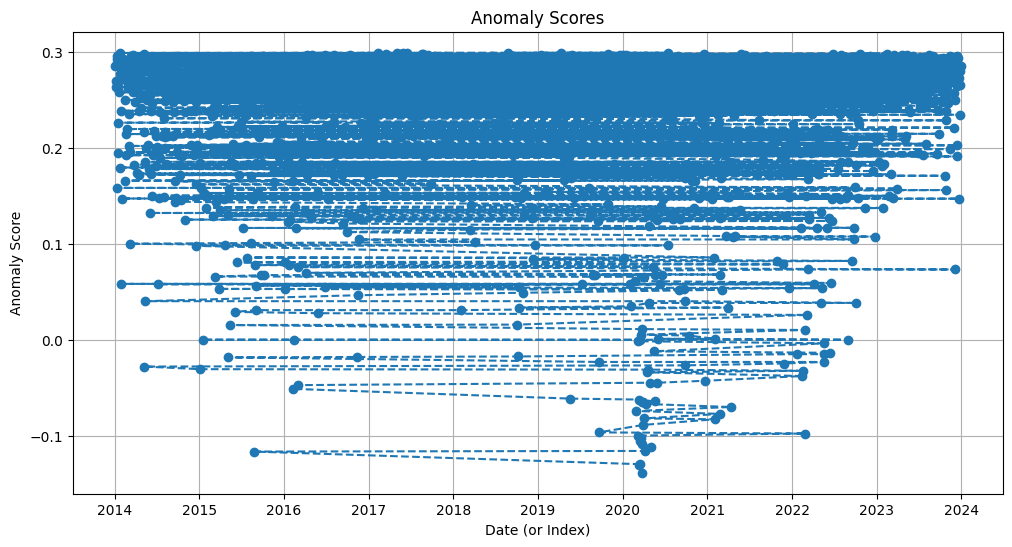

In [22]:
import matplotlib.pyplot as plt

# Plotting Anomaly Scores
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['Anomaly_Score'], marker='o', linestyle='--')
plt.title('Anomaly Scores')
plt.xlabel('Date (or Index)')
plt.ylabel('Anomaly Score')
plt.grid(True)
plt.show()


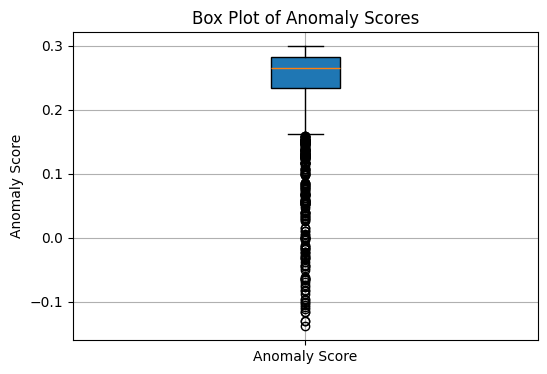

In [23]:
import matplotlib.pyplot as plt
# Create a box plot for Anomaly Scores
plt.figure(figsize=(6, 4))
plt.boxplot(sorted_data['Anomaly_Score'], vert=True, patch_artist=True)
plt.title('Box Plot of Anomaly Scores')
plt.ylabel('Anomaly Score')
plt.xticks([1], ['Anomaly Score'])
plt.grid(True)
plt.show()

In [24]:
# Print the last 5 rows (adjust the number as needed)
print(sorted_data[['Anomaly_Score']].tail(5))

            Anomaly_Score
Date                     
2020-04-07      -0.115841
2015-08-24      -0.116497
2020-03-16      -0.129645
2020-03-12      -0.130750
2020-03-23      -0.138530


In [25]:
# Generate a buy when Anomaly score is range -0.169 to -0.06, sell when the Anomaly score is in  between 0.30 to 0.35,

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np


# Step 1: Initialize
initial_investment = 100000  # $100K
portfolio_value = initial_investment
position = None
buy_price = 0

# Create empty DataFrame to hold metrics
columns = ['Buy Date', 'Buy Price', 'Sell Date', 'Sell Price', '% Change', 'Portfolio Value', 'Profit %', 'Drawdown']
metrics_list = []

# Step 2: Fetch Data
#data = yf.download(ticker, period='6mo')
data['Anomaly_Score'] = data['Anomaly_Score'] # Replace with your real Anomaly Score calculation

# Initialize metrics variables
peak_value = initial_investment  # for drawdown calculation

# Step 3: Trading Logic
for date, row in data.iterrows():
    anomaly_score = row['Anomaly_Score']
    
    if 0.20 <= anomaly_score <= 0.35:
        # Buy logic
        if position is None:
            position = 'long'
            buy_price = row['Close']
            buy_date = date
    
    elif -0.3 <= anomaly_score <= -0.015:
        # Sell logic
        if position == 'long':
            sell_date = date
            sell_price = row['Close']
            position = None
            
            profit_percent = ((sell_price - buy_price) / buy_price) * 100
            profit = (sell_price - buy_price) * (initial_investment / buy_price)
            portfolio_value += profit
            
            drawdown = ((peak_value - portfolio_value) / peak_value) * 100
            
            # Update peak_value
            peak_value = max(peak_value, portfolio_value)
            
            # Append to metrics list
            metrics_list.append({
                'Buy Date': buy_date, 'Buy Price': round(buy_price,2),
                'Sell Date': sell_date, 'Sell Price': round(sell_price,2),
                '% Change': round(profit_percent,2), 'Portfolio Value': round(portfolio_value,0),
                'Profit %': round(profit_percent,2), 'Drawdown': round(drawdown,2),
            })

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df

,Buy Date,Buy Price,Sell Date,Sell Price,% Change,Portfolio Value,Profit %,Drawdown
0,2014-01-03,6211.15,2014-05-09,6858.80,10.43,110427.0,10.43,-10.43
1,2014-05-14,7108.75,2015-01-06,8127.35,14.33,124756.0,14.33,-12.98
2,2015-01-07,8102.10,2015-05-06,8097.00,-0.06,124693.0,-0.06,0.05
3,2015-05-07,8057.30,2015-08-24,7809.00,-3.08,121611.0,-3.08,2.52
4,2015-08-25,7880.70,2016-02-11,6976.35,-11.48,110136.0,-11.48,11.72
5,2016-02-12,6980.95,2016-03-01,7222.30,3.46,113593.0,3.46,8.95
6,2016-03-04,7485.35,2016-11-11,8296.30,10.83,124427.0,10.83,0.26
7,2016-11-16,8111.60,2018-10-05,10316.45,27.18,151608.0,27.18,-21.52
8,2018-10-08,10348.05,2019-05-20,11828.25,14.30,165913.0,14.30,-9.43
9,2019-05-21,11709.10,2019-09-20,11274.20,-3.71,162198.0,-3.71,2.24


In [ ]:
###################### The End #######################################################################